In [176]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter

In [177]:
# Caminho do dataset
path = 'C:/Users/Thiago/Documents/CSV/felicidade_2017.csv'

In [178]:
# Criando o dataframe
df = pd.read_csv(path)

In [179]:
# Renomeando as colunas
df.columns = 'Pais Ranking Score wh wl PIB Familia Exp_vida Liberdade Generosidade Confiança_governo Distopia_residual'.split()

In [180]:
# Excluindo duas colunas redundantes
df.drop(['wh','wl'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


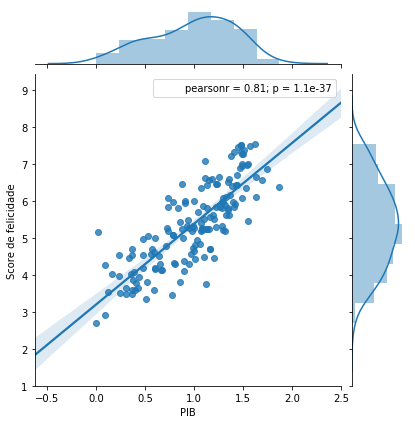

In [187]:
# Scatter plot de duas colunas do dataframe
sb.jointplot(x=df['PIB'],y=df['Score'],kind='reg')
plt.ylabel('Score de felicidade');

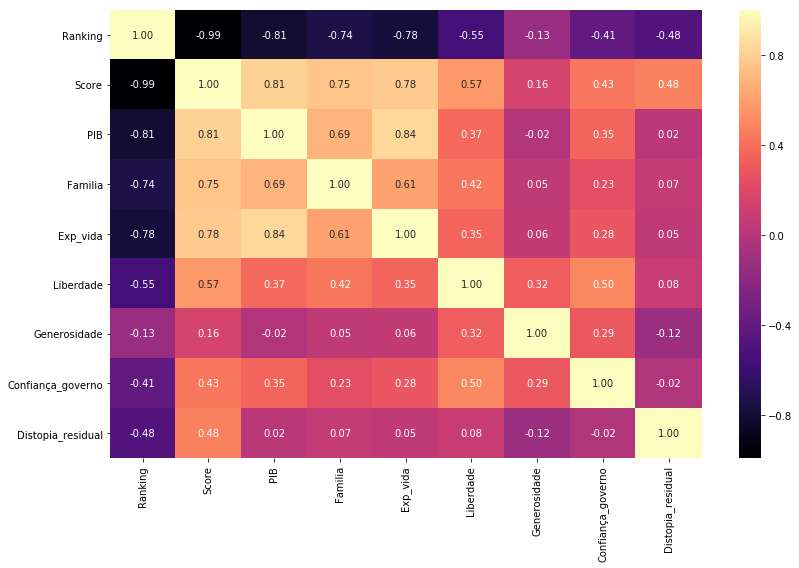

In [188]:
# Heatmap de correlação entre as variáveis
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True,cmap='magma',fmt='.2f')
plt.tight_layout()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


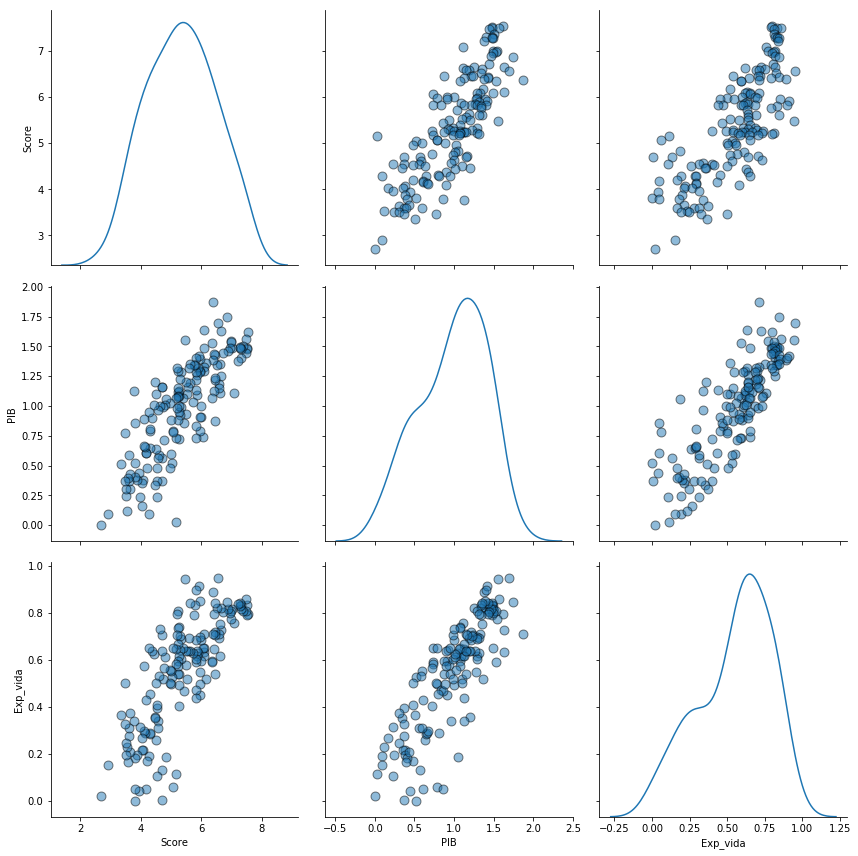

In [189]:
# Pair plot das variáveis: Score, PIB e expectativa de vida
sb.pairplot(df, 
            vars = ['Score','PIB','Exp_vida'],
            diag_kind ='kde',
            plot_kws = {'alpha': 0.5, 's': 80, 'edgecolor': 'k'},
            size=4);

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


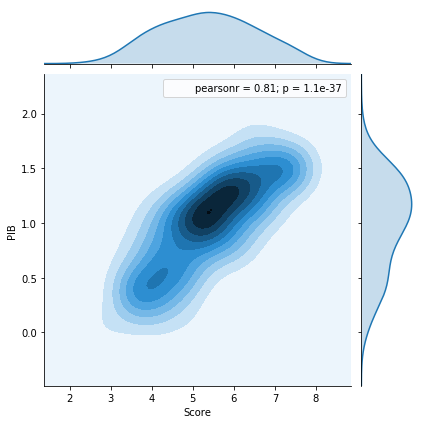

In [190]:
# KDE das variáveis: Score e PIB
sb.jointplot(x=df['Score'],y=df['PIB'],kind='kde');

In [191]:
# Função para classificar os países pelo seu score
# Se score >= media(score) = país feliz
# Senão = país triste
def Rotular(df):
    lista_target = []
    for score in df['Score']:
        if score >= df['Score'].mean():
            lista_target.append(1)
        else:
            lista_target.append(0)
    return lista_target

# Criando uma nova coluna no dataframe
df['Target'] = Rotular(df)

Text(0,0.5,'Contagem')

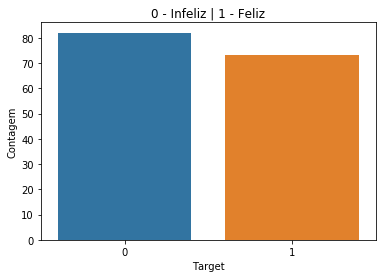

In [192]:
# Contagem de países felizes e infelizes
sb.countplot(df['Target'])
plt.title('0 - Infeliz | 1 - Feliz')
plt.ylabel('Contagem')

In [193]:
# Divide os dados em características e varíavel preditiva
# onde X são as características (Score, PIB, etc..)
# e y é o Target
def SplitData():
    X = np.array([])
    y = np.array([])
    
    X = df.drop(['Pais','Ranking','Target'],axis=1)
    y = df['Target']
    
    # Não é necessário, pois os dados já estão na mesma escala
    #X = MinMaxScaler().fit_transform(X)
    
    return X,y

X,y = SplitData()

In [194]:
# Dividindo os dados em 70% para treinamento e 30% para teste
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [195]:
# Print das divisões
print('Total de amostras:', X.shape[0])
print('Amostras p/ treino:', X_train.shape[0])
print('Amostras p/ teste:', X_test.shape[0])

Total de amostras: 155
Amostras p/ treino: 108
Amostras p/ teste: 47


In [196]:
# Print da distribuição dos países
print('Países infelizes/felizes p/ treino:',Counter(y_train))
print('Paiíses infelizes/felizes p/ teste:',Counter(y_test))

Países infelizes/felizes p/ treino: Counter({1: 55, 0: 53})
Paiíses infelizes/felizes p/ teste: Counter({0: 29, 1: 18})


In [197]:
# Definindo o modelo. profundidade da árvore = 3
model = DecisionTreeClassifier(max_depth=3)

In [198]:
# Treinando o modelo
model.fit(X_train,y_train);

In [199]:
# Armazenando as predições
y_pred = model.predict(X_test)

In [200]:
# Comparativo dos valores reais contra as predições
for real,predito in zip(y_test,y_pred):
    print('Real:{} | Predito:{}'.format(real,predito))

Real:1 | Predito:1
Real:0 | Predito:0
Real:1 | Predito:1
Real:0 | Predito:0
Real:1 | Predito:1
Real:1 | Predito:1
Real:0 | Predito:0
Real:1 | Predito:1
Real:1 | Predito:1
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:1 | Predito:1
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:1 | Predito:1
Real:1 | Predito:1
Real:0 | Predito:0
Real:1 | Predito:1
Real:1 | Predito:1
Real:1 | Predito:1
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:1 | Predito:1
Real:1 | Predito:1
Real:1 | Predito:1
Real:1 | Predito:1
Real:0 | Predito:0
Real:1 | Predito:1
Real:0 | Predito:0
Real:0 | Predito:0
Real:0 | Predito:0
Real:1 | Predito:1


In [201]:
# Acurácia no treinamento e no teste
print('Acurácia treino:',model.score(X_train,y_train))
print('Acurácia teste:',model.score(X_test,y_test))

Acurácia treino: 1.0
Acurácia teste: 1.0


In [202]:
# Relatório de classificação
print('| Classification Report |\n')
print(classification_report(y_test,y_test))

| Classification Report |

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [203]:
# https://www.linkedin.com/in/thiagomunich